# Algorithme k-means  
## Sur des données de test  
----

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
class Point():
    
    def __init__(self, coords, color='black'):
        self.coords = coords
        self.x = self.coords[0]
        self.y = self.coords[1]
        self.color = color

In [38]:
p1 = Point([1.5, 2], 'b')
p2 = Point([1, 1], 'b')
p3 = Point([3, 2.5], 'b')
p4 = Point([3.1, 2], 'b')
p5 = Point([2.5, 2], 'b')
p6 = Point([2.9, 3], 'b')


p7 = Point([8, 5], 'r')
p8 = Point([9, 5.5], 'r')
p9 = Point([7.5, 6], 'r')
p10 = Point([7, 6.2], 'r')
p11 = Point([8.5, 4.8], 'r')
p12 =Point([7, 6], 'r')

p13 = Point([1, 7], 'g')
p14 = Point([2.5, 7.9], 'g')
p15 = Point([3, 8], 'g')
p16 = Point([2, 9.8], 'g')
p17 = Point([1.5, 9.5], 'g')
p18 = Point([2.2, 8.8], 'g')

L = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15, p16, p17, p18]

X = [p.x for p in L]
Y = [p.y for p in L]
colors = [p.color for p in L]
df = pd.DataFrame({'X':X, 'Y':Y, 'colors':colors})

In [39]:
df

,X,Y,colors
0,1.5,2.0,b
1,1.0,1.0,b
2,3.0,2.5,b
3,3.1,2.0,b
4,2.5,2.0,b
5,2.9,3.0,b
6,8.0,5.0,r
7,9.0,5.5,r
8,7.5,6.0,r
9,7.0,6.2,r


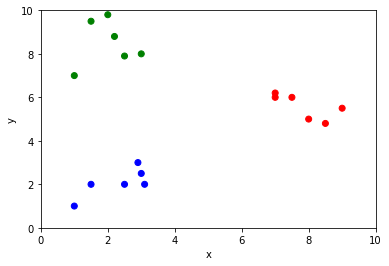

In [40]:
plt.scatter(df['X'], df['Y'], c=colors)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

0.19999999999999996 9.8 0.11999999999999988 10.680000000000001
[[0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
 [0.2969697  0.2969697  0.2969697  ... 0.2969697  0.2969697  0.2969697 ]
 [0.39393939 0.39393939 0.39393939 ... 0.39393939 0.39393939 0.39393939]
 ...
 [9.60606061 9.60606061 9.60606061 ... 9.60606061 9.60606061 9.60606061]
 [9.7030303  9.7030303  9.7030303  ... 9.7030303  9.7030303  9.7030303 ]
 [9.8        9.8        9.8        ... 9.8        9.8        9.8       ]]


Text(0.5, 1.0, 'densité du noyau gaussien')

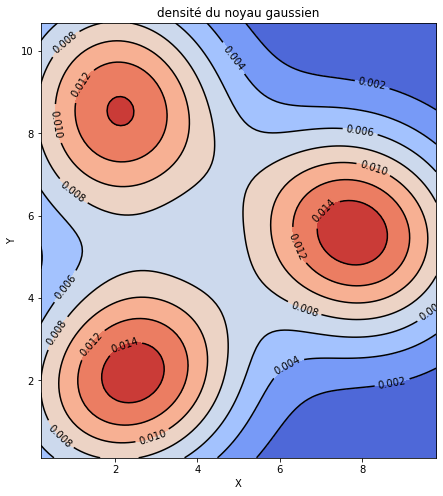

In [49]:
# définir les bords
deltaX = (max(df['X']) - min(df['X']))/10
deltaY = (max(df['Y']) - min(df['Y']))/10
xmin = min(df['X']) - deltaX
xmax = max(df['X']) + deltaX
ymin = min(df['Y']) - deltaY
ymax = max(df['Y']) + deltaY
# création meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j] #100j sert à lisser les courbes 
pr

#adaption à un noyau gaussien en utilisant la méthode gaussian_kde de la scipy
positions = np.vstack([xx.ravel(), yy.ravel()]) 
values = np.vstack([df['X'], df['Y']])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('densité du noyau gaussien')

----